# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [63]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [64]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,85,20959,45828,36,24231,1423
2,4446,906,1238,3576,153,1014


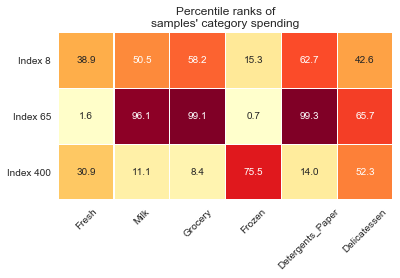

In [65]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [8,65,400]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

import matplotlib.pyplot as plt
import seaborn as sns
#data rank of choiced data
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)

#visualize % of choiced data
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 3071.9
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**
My personal understanding of what each product category is would be something like:

* Fresh : Vegetables, fruits, greens; things you'd most likely find at a farmer's market of sorts.
* Milk: Milk and dairy products.
* Grocery: All packaged food items not labeled fresh, frozen, or delicatessen.  I would suspect products like meats, cheeses, coffee beans, and sweets would fall in this category
* Frozen: Pre-packaged frozen products. I'd imagine ice cream would be a product of this, as would be things like prepared meals, frozen meats and vegetables, etc.
* Detergents_Paper : This would most likely include paper products and cleaning products. I'd suspect it could include office products, but more than likely it means things like toiletries and products like bleach, soaps, cleaners, etc.
* Delicatessen: Ready to eat coldcut meats and cheeses.

Customer 8: This customer spends about an average amount on all categories except frozen(15.3%). This could correspond to an average-sized mom-and-pop store selling various kinds of food or small restaurants but having no space/money for huge freezers.

Customer 65: This customer has focuses most on Milk(96.1%), grocery(99.1%), detergents_paper(99.3%) products. And fresh fruits and vegatables and frozen categories are purchased at a bare minimum. Coffee houses needs a lot of milk and coffee beans (which I assume to be in the Grocery category), paper and detergents for cleaning up, a smell deli section for making sandwiches for customers to snacks on while drinking their coffee. From these details,I believe this customer represents a very well off coffee shop or chain restaurants based on the statistics in the dataset.

Customer 400: This customer has focuses most on frozen products(75.5%). This claim is backed up by argument that customer-400 spending on Frozen products is 500 mu more than dataset mean of frozen product. It spends less on all other products and this claim is backed up by comparing dataset product mean and sample spending of every product. From these details, it can be a warehouse or some storage facility.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [66]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
def predict_feature(feature):
    # TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis=1)
    
    # TODO: Split the data into training and testing sets(0.25) using the given feature as the target
    # Set a random state.
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=0)
    
    # TODO: Create a decision tree regressor and fit it to the training set
    regressor = DecisionTreeRegressor(random_state=0).fit(X_train, y_train)
    
    # TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    
    print("The score of feature {:16} is {:+.5f}".format(feature, score))

for feature in data.columns.values:
    predict_feature(feature)

The score of feature Fresh            is -0.25247
The score of feature Milk             is +0.36573
The score of feature Grocery          is +0.60280
The score of feature Frozen           is +0.25397
The score of feature Detergents_Paper is +0.72866
The score of feature Delicatessen     is -11.66369


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

I attempted to predict all six of the target features and the prediction scores are shown below.

|  Feature  |  Fresh  |  Milk  |  Grocery  |  Frozen  |  Detergents_Paper  |  Frozen  |
| :-------: | :----:  | :----: | :-------: | :------: | :----------------: | :------: |
|   Score   | -0.252  | 0.366  |   0.602   |  0.253   |       **0.728**        |  -11.66  | 

Of the six categories, Detergents_Paper seems to be strongly predictable by all of the other categories with a reasonable R^2 score 72%. If I really wanted to drop features this one would be my first choice, since the information is delivers seems to be contained to a large extend in the other features. Follow closely by Grocery with a score of 60%. It maybe my second choice if i want to drop features again. 

Other features like Fresh, Frozen or Milk have very low scores. This indicates that their information is unique and not contained in the other features, which is why we should keep them. They do not have strong correlations with the other categories, and we believe should be necessary for identifying customers' spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


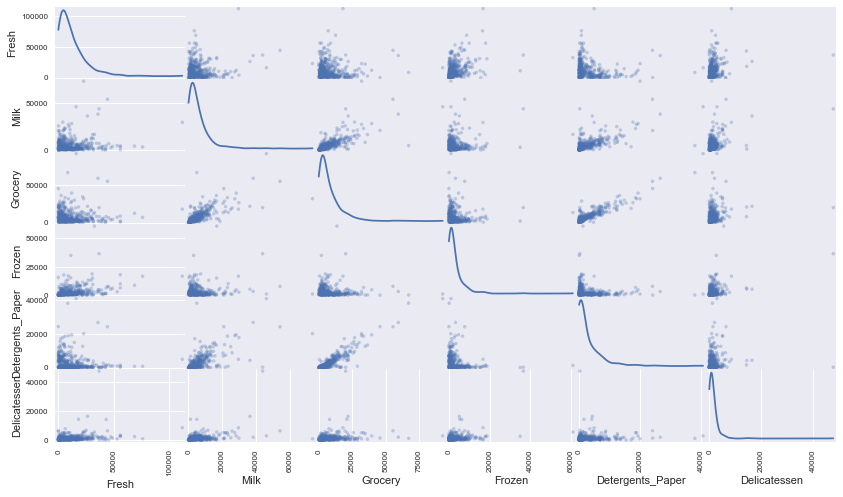

In [67]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [68]:
data.corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicatessen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

From the scatter matrix, it can be observed that that the pair (Grocery, Detergents_Paper) seems to have the strongest correlation between the features. Based on the correlation matix as above, we can see that the corr. rate of this pair is 92%. It also confirm this pair has strongest correlation. The pair (Grocery, Milk) also seem to exhibit some degree of correlation (corr. rate is 72%).  Milk and detergent papers are also correlated, but degree of correlation is not high, hence I am not counting that. I tried to predict Detergents_Paper and as I had mentioned above, Detergents_Paper must be correlated with atleast one feature. This confirms my suspiction. 

This scatter matrix also confirms my initial suspicions that the "Fresh" product category does not have significant correlations to any of the remaining features and therefore, its information is necessary to accurately predict customers' behavior. 

The distributions for all features does not appear to be normal. Rather, all distributions have a spike at very low values and then drop quickly. I know two distributions which have a somewhat similar shape: log-normal and beta. Below,  I have plotted normal, log-normal and beta distribution for visual comparison. It seems like the log-normal distribution is the best fit for the data. It has a clearer spike and drops off quicker than the beta distribution, we seems to be much more in line with the data we have. A log-normal distribution is also what we would expect for data describing amounts of money.

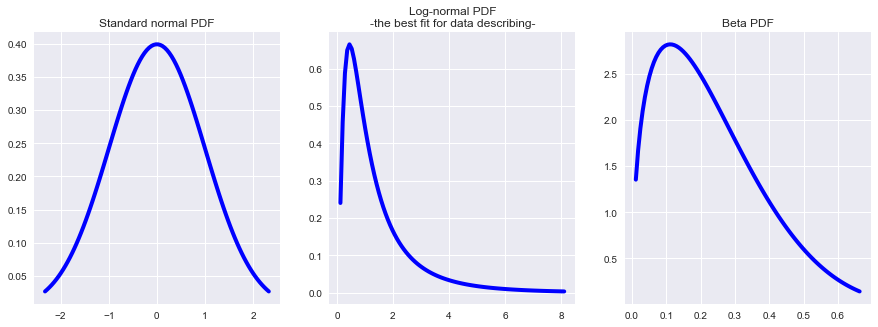

In [69]:
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import beta
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

def plot_norm(ax):
    ax.set_title("Standard normal PDF")
    x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
    ax.plot(x, norm.pdf(x), 'b-', lw=4)

def plot_lognorm(ax, shape):
    ax.set_title("Log-normal PDF\n-the best fit for data describing-")
    x = np.linspace(lognorm.ppf(0.01, shape), lognorm.ppf(0.99, shape), 100)
    ax.plot(x, lognorm.pdf(x, shape), 'b-', lw=4)

def plot_beta(ax, a, b):
    ax.set_title("Beta PDF")
    x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
    ax.plot(x, beta.pdf(x, a, b), 'b-', lw=4)

plot_norm(ax1)
plot_lognorm(ax2, 0.9)
plot_beta(ax3, 1.5, 5.0)

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


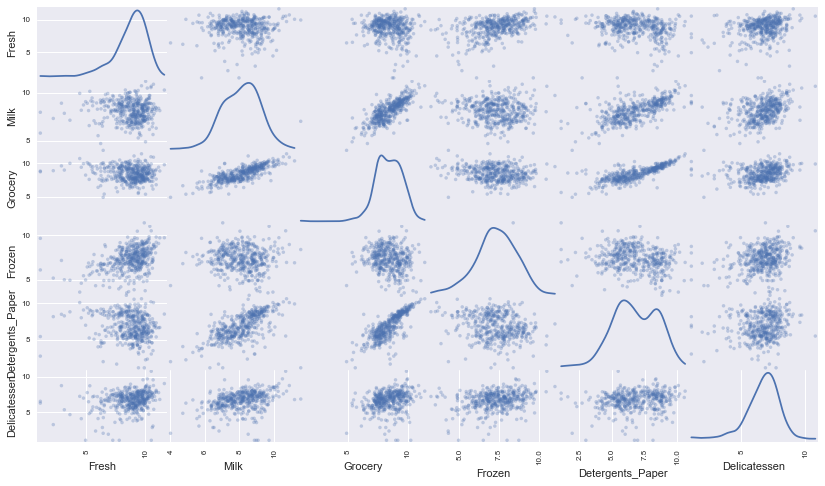

In [70]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [71]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
1,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
2,8.399760,6.809039,7.121252,8.182000,5.030438,6.921658


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [72]:
from collections import Counter
outliers_counter = Counter()

outliers_scores = None 

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    zeros = np.zeros(len(log_data[feature]))
    above = log_data[feature].values - Q3 - step
    below = log_data[feature].values - Q1 + step
    current_outliers_scores = np.array(np.maximum(zeros, above) - np.minimum(zeros, below)).reshape([-1,1])
    outliers_scores = current_outliers_scores if outliers_scores is None else np.hstack([outliers_scores, current_outliers_scores])
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    current_outliers = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(current_outliers)
    outliers_counter.update(current_outliers.index.values)
    
# OPTIONAL: Select the indices for data points you wish to remove
min_outliers_count = 2
outliers = [x[0] for x in outliers_counter.items() if x[1] >= min_outliers_count]
print("Data points considered outlier for more than 1 feature: {}".format(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Data points considered outlier for more than 1 feature: [128, 154, 65, 66, 75]


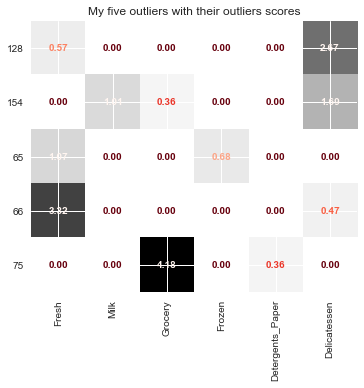

In [73]:
def plot_heatmap(percentiles_data, ax=None, figsize=(10,5), title="Heatmap"):
    fig, ax = plt.subplots(figsize=figsize) if ax is None else (None, ax)
    ax.set_title(title)
    ax.imshow(percentiles_data, cmap=plt.cm.Greys, interpolation='nearest')
    ax.set_xticks(np.arange(len(percentiles_data.columns.values)))
    ax.set_xticklabels(percentiles_data.columns.values, rotation=90)
    ax.set_yticks(np.arange(len(percentiles_data.index.values)))
    ax.set_yticklabels(percentiles_data.index.values)
    for i, feature in enumerate(percentiles_data):
        for j, _ in enumerate(percentiles_data[feature]):
            ax.text(i, j, "{:0.2f}".format(percentiles_data.iloc[j,i]), verticalalignment='center',\
                    horizontalalignment='center', color=plt.cm.Reds(1-percentiles_data.iloc[j,i]), fontweight='bold')
import pandas as pd
plot_heatmap(pd.DataFrame(data=outliers_scores[outliers], index=outliers, columns=log_data.columns), title="My five outliers with their outliers scores")

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

Based on the outlier step, there are 42 data points that are considered outliers. I do not think we should remove all of the outliers as in total they represent 9.5% of the dataset. Removing the 42 data points could cause us to lose imporant information necessary to correctly classify customer behavior. 

The above plot contains the 5 outliers  (i.e. indeces 65,66,75,128,154) indentified with the method above along with a per-feature "outlier score", which is the number by which a feature value execeeds the maximum/minimum allowed value according to Tukey's method. 

I think only this 5 outliers points should be removed because these points may be noise in the data. Due to them, data is skewed. These outliers may actually represent certain customer group behavior. Others may actually represent certain customer group behavior and it should not be removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

PCA dimensions 1&2 cumulative sums:  0.7068
PCA dimensions 1,2,3&4 cumulative sums:  0.9311


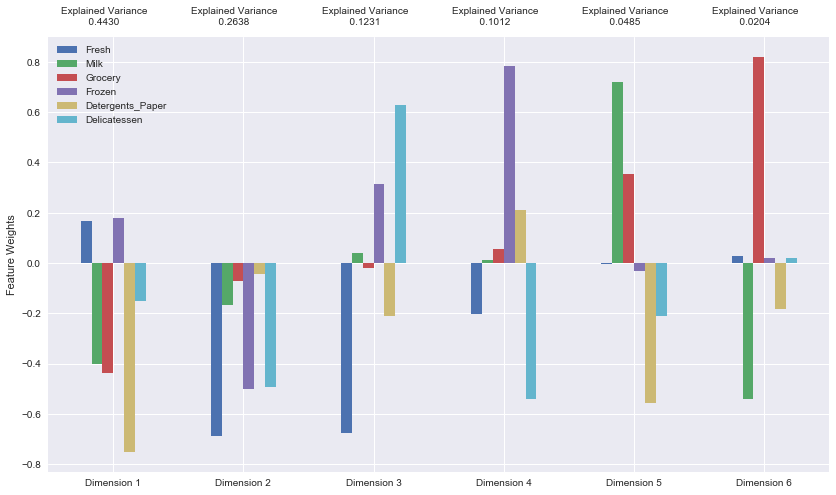

In [77]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

# Print cumulative sums of the variances explained by the PCA as suggested by reviewer.
print "PCA dimensions 1&2 cumulative sums: ", pca_results['Explained Variance'].cumsum()[1]
print "PCA dimensions 1,2,3&4 cumulative sums: ", pca_results['Explained Variance'].cumsum()[3]

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

In total, the first and second principal components explain 71% of the variance in the data. On the other hand the first 4 components explain 93% of the variance in the data. 
In the visualization above, we can see the linear coefficients of each feature for the components. High positive/negative values indicate that the corresponding features contributs a lot to the components value (in either positive or negative way). Low values mean that the feature has no impact. The first 4 components can thus be described as follows:

Component1: A customer with significant negative weight on Detergents & Paper(weight~-0.8), Milk and Grocery(weights~-0.4), while those with low values in the component purchase very little(<0.2). If value is positive,this component can be described as spending on retail goods. This could represent a convinience store.

Component 2: For dimension 2. Every feature weight is negative. But weight corresponding to Fresh, Frozen and delicatessen is dominant. This also proves a orthogonality of PCA dimensions. If value is positive, then following cases are possible: A customer with high values in this component purchase a lot in Fresh,
 Frozen and Delicatessen (weight>0.4), It can be described as characteristic of restaurants and hotels with Deli food.

Component 3: A customer with higher values on the third dimension would spends heavily on Delicatessen(weight~0.6), a decent amount on Frozens(weight~0.3) and significant negative weight is placed on Freshs(weight~-0.7). This component can be described as characteristic of retailers selling special Deli food.

Component 4: A customer with higher fourth dimension values would spend heavily on Frozen(weight~0.8), some on Detergents_paper, and very little in Grocery, and significant negative weight is placed on Delicatessen (weight - ~0.6). This could represent a warehouse or some storage facility.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [78]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.8636,0.6650,-0.5376,-0.7922,-0.1551,0.0344
1,-5.6796,3.9535,1.4373,-1.5213,0.2948,0.0874
2,2.5025,0.1006,1.0091,0.1630,-0.5126,-0.0520


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


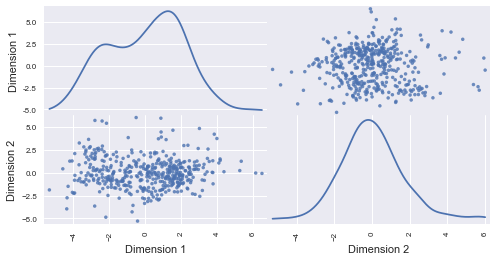

In [82]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Produce a scatter matrix for each pair of newly-transformed features as suggested by reviewer
pd.scatter_matrix(reduced_data, alpha = 0.8, figsize = (8,4), diagonal = 'kde');

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [80]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-0.8636,0.6650
1,-5.6796,3.9535
2,2.5025,0.1006


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

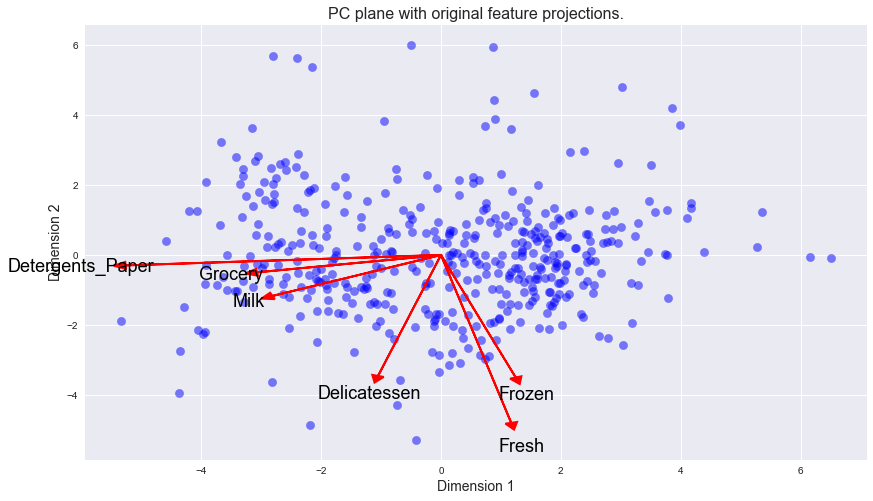

In [81]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

The advantage of K-Means clustering algorithm is it is simple to understand, fast, efficient and more scalable. It is the simplicity of its underlying assumptions which allows the algorithm to be robust, reliable and fast. This also allows the model to outperform other algorithms on large datasets. In addition, while K-means always converges(locally or globally) on the K-clusters after a given number of iterations, this algorithm performs best on data that is clearly defined and well sperated. K-Means is also easy to implement and visulize in process.

The advantages of Gaussian Mixture Model (GMM) cluster algorithm is more flexible than K-Means by using soft assignments of points to cluster. It allows for mixed membership of points in more than one cluster by using probability surfaces for a point to belong to a mixture of clusters, assuming elliptical shapes in the data distributions in the cluster. 

On the other hand, the advantage of a Gaussian Mixture Model (GMM), is its capability of incorporating the covariance between the points into the model to identify more complex clusters. Unlike K-means which assumes, during each iteration, that any given point can only belong to a specific cluster, GMM also takes into account the level of certainty with which a point belongs to a given cluster. This uncertainty is also revised during each iteration making the algorithm more flexible when assigning points to a cluster and capable of performing well on in less clearly defined datasets.

From the biplot, it can be observed that the data points are mostly densily packed on an area of the plot but do not form clearly deliniated clusters as certain points seem to be in the border bettween two or more groups. We can also observe that certain dimensions in the data (i.e. Milk-Grocery-Detergents and Fresh-Frozen) have a strong degree of correlation between each other. Based on these facts and on the previous discussion, we can safely conclude that applying a Gausian Mixture Model will produce the best outcome for the problem at hand.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

For GMM of n_clusters = 10 , the silhouette_score = 0.299186881946
For GMM of n_clusters = 9 , the silhouette_score = 0.307753432384
For GMM of n_clusters = 8 , the silhouette_score = 0.312429666347
For GMM of n_clusters = 7 , the silhouette_score = 0.33796693332
For GMM of n_clusters = 6 , the silhouette_score = 0.294294828555
For GMM of n_clusters = 5 , the silhouette_score = 0.318503760274
For GMM of n_clusters = 4 , the silhouette_score = 0.293269564847
For GMM of n_clusters = 3 , the silhouette_score = 0.375532188938
For GMM of n_clusters = 2 , the silhouette_score = 0.421916846463


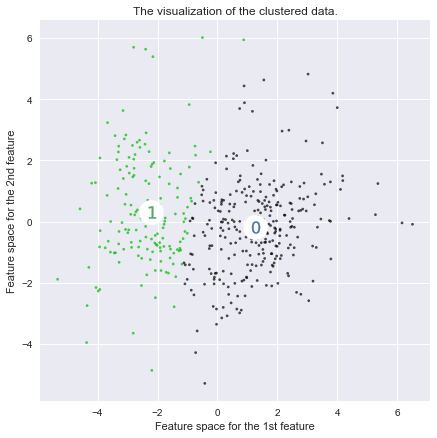

In [137]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm

range_n_clusters = [10,9,8,7,6, 5, 4, 3, 2]

for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = GaussianMixture(n_components=n_clusters, random_state=10)
    clusterer.fit(reduced_data)

    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    # centers = clusterer.cluster_centers_ - only for KMeans - means_ is the center for GMM.
    centers = clusterer.means_

    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print "For GMM of n_clusters =", n_clusters, ", the silhouette_score =", score

# Draw white circles at cluster centers
range_n_clusters = [2]
fig, (ax2) = plt.subplots(1,1)
fig.set_size_inches(7, 7)
colors = cm.spectral(preds.astype(float) / n_clusters)
ax2.scatter(reduced_data['Dimension 1'], reduced_data['Dimension 2'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)
ax2.scatter(centers[:, 0], centers[:, 1],marker='o', c="white", alpha=1, s=600)
for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=150)
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")


### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

We tried cluster numbers from 10 to 2. You can see the silhouette scores above. 
Higher scores are better and the highest of all scores was found for 2 clusters. Since the scores keep dropping for higher numbers, I do not expect to find better scores for larger numbers of clusters. As the summaries show, we generally got better silhouette scores as we reduced the number of clusters.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

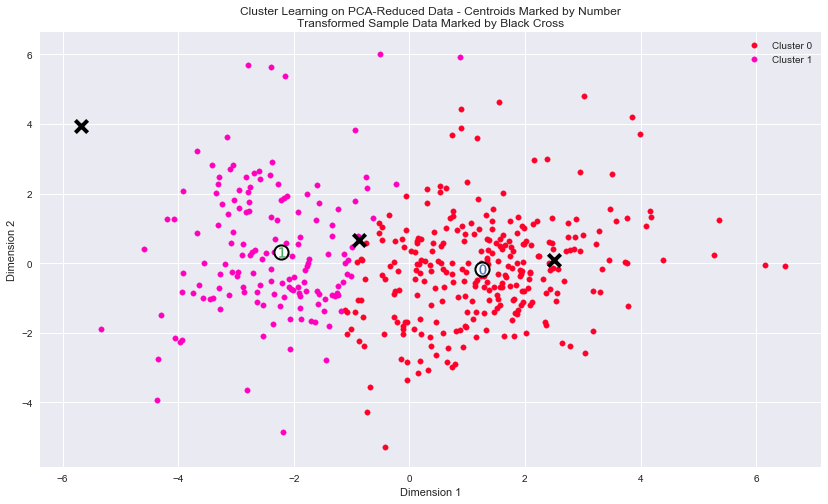

In [138]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [140]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Display a description of the good dataset
print "\nGood Dataset Statistics with outliers removed."
display(np.exp(good_data).describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8953.0,2114.0,2765.0,2075.0,353.0,732.0
Segment 1,3552.0,7837.0,12219.0,870.0,4696.0,962.0



Good Dataset Statistics with outliers removed.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,12089.372414,5788.103448,7911.158621,3096.126437,2848.473563,1536.797701
std,12662.796341,7374.172350,9365.740973,4873.769559,4679.364623,2833.363881
min,3.000000,112.000000,218.000000,25.000000,3.000000,3.000000
25%,3208.000000,1579.500000,2156.000000,770.500000,260.000000,411.500000
50%,8565.000000,3634.000000,4757.000000,1541.000000,813.000000,967.000000
75%,16934.500000,7168.000000,10665.500000,3559.500000,3935.000000,1825.500000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

Looking at the good_data statistics with the outliers removed as above, we see that:

Segment 0 seems to represent customers that purchase large quantities of fresh fruit and vegatables and frozen products more than Q2 (50% of the data). For other item, they do not purchase so much (<O2). It most likely represent some type of warehouse or some storage facility.

Segment 1 seems to represent customers that purchase large quantities of milk,  grocery, and detergents_paper products more than Q3 (75% of the data). I believe this customer represents a coffee shop or restaurants based on the statistics in the dataset.


### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0

     Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
8     38.9  50.5     58.2    15.3              62.7          42.6
65     1.6  96.1     99.1     0.7              99.3          65.7
400   30.9  11.1      8.4    75.5              14.0          52.3


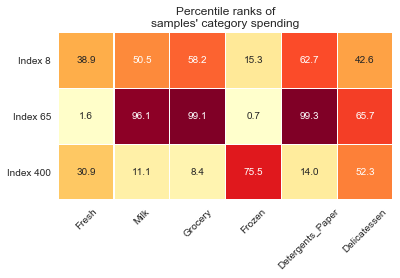

In [142]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
        
# look at percentile ranks
pcts = 100. * data.rank(axis=0, pct=True).iloc[indices].round(decimals=3)
print "\n", pcts

# visualize percentiles with heatmap
sns.heatmap(pcts, annot=True, linewidth=.1, vmax=99, fmt='.1f', cmap='YlOrRd', square=True, cbar=False)
plt.yticks([2.5,1.5,.5], ['Index '+str(x) for x in indices], rotation='horizontal')
plt.xticks(rotation=45, ha='center')
plt.title('Percentile ranks of\nsamples\' category spending');

**Answer:**

For the 3 samples that we picked earlier, sample points 1 and 2 (sample point 0 and 1) are placed in customer segment 1, which have high Milk, Grocery and Detergents_Paper feature spending patterns. This is consistant with what we predicted before (coffee shop or restaurants), since they also purchase high quantities of Milk, Grocery and Detergents_Paper products as can be seen in the percentile ranks heatmap. 

Sample point 3 (sample point 2) is placed in customer segment 0, which have high Fresh and Frozen feature spending patterns. This is also consistant with what we predicted before(warehouse or storage facility, retailers), since sample 3 also purchase high quantities of Frozen according to the heatmap.


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

By identifying the underlying type of customer segments (through clustering), the wholesaler will be able to draw more meaningfull hypothesis about expected behavior of the customers in each segment prior to performing the A/B test. Then these hypothesis may be tested on each segment separately to find more meaningful conclusions and understand the impact level on each independent customer segment.

For example, by observing the definitions of these two customer segments, the wholesaler could draw the preliminary hypothesis that "Retailers" customers(i.e. Segment 0) and "restaurant" customers (i.e. Segment 1) will react different to a reduction in number of deliveries.

The customer from segment 1(restaurant) will potentially react negatively as they are more concerned with having fresh products to serve their clients. Changing delievery service from 5 days a week to 3 days a week will have some drastic impact on segment who spends more money on Fresh food. It would force them to increase their inventory levels and keep produce longer which may increase spoilage of certain producs, and possibly a reduction in the quality of food that they serve their clients.

On the other hand, customers from segment 0(warehouse/storage facility) may not care that much, provided they can store a sufficient amount of fresh fruit and vegatables and frozen products.

However, those are just guesses, and an effective A/B testing program will be able to statistically prove if changing the delievery service will make different customer segments react positively or negatively to the change, or none at all. 

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

As suggested in hint, a supervised learner can be used. We can use the trained GMM to generate/predict the customer's segment as a basis for the training labels on the supervised learner. The wholesale distributor could train a supervised machine learning classification algorithm (e.g. SVC, or decision tree classifier, etc) with the initial dataset's customer product spending as inputs and the customer segments (as obtained from GMM clustering) as the target variable. 

This concept is called feature engineering, and will use the output of an unsupervised learning analysis as input to a new supervised learning analysis. Once the classifier is trained it can be used to predict the customer segment for new customers which would then determine the most appropriate delivery service (3 days per week or 5 days per week).

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

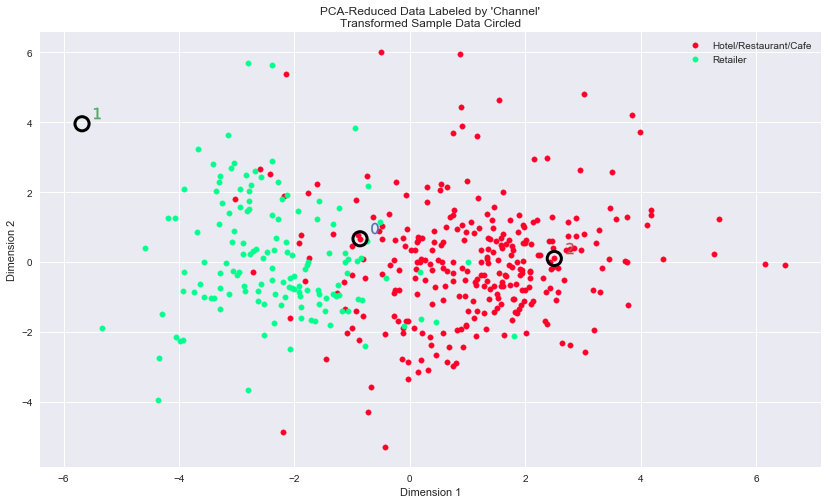

In [144]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

On the whole, the 2 clusters predicted by the GMM maps correctly to the Channel
label, but it appears that the distribution of Retailers and Hotels/Restaurants/Cafes are more mixed than GMM predicted. The clustering is not consistent with what I suspected earlier about the data. The customer segments as classified here don't match I previously defined in Question 8 (i.e Green points: Retailer, Red Points: Restaurants). Our previous definition of the customer segments does not quite fit with these classification. If this feature was present initally, then number of clusters and clustering algorithm might change.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.